<a href="https://colab.research.google.com/github/Twisterrr/tu-assignment/blob/main/Big_Data_Concept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from math import ceil

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/Twisterrr/tu-assignment/main/fifa.csv') #keeping only the date and data columns we will use
print(df.head())

       id                     name   rating  position   height    foot   rare  \
0    1001             Gábor Király       69        GK      191   Right      0   
1  100143             Frederik Boi       65         M      184   Right      0   
2  100264          Tomasz Szewczuk       57         A      185   Right      0   
3  100325   Steeve Joseph-Reinette       63         D      180    Left      0   
4  100326             Kamel Chafni       72         M      181   Right      0   

   pace  shooting  passing  dribbling  defending  heading  diving  handling  \
0                                                              70        66   
1    61        65       63         59         62       62                     
2    65        54       43         53         55       74                     
3    68        38       51         46         64       71                     
4    75        64       67         72         57       66                     

   kicking  reflexes  speed   position

Text(0.5, 1.0, 'Distribution of people with left-handed or right-handed feet ')

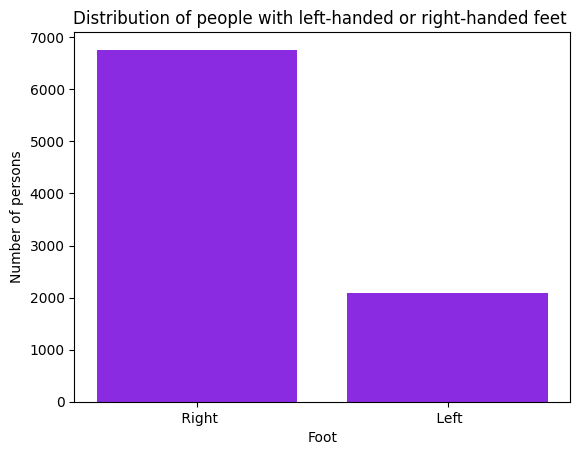

In [16]:
foot_right_left = np.array(df[' foot'].values.flatten())
count_right_left = pd.Series(foot_right_left).value_counts()

plt.bar(count_right_left.index, count_right_left.values , color='#8A2BE2')
plt.xlabel('Foot')
plt.ylabel('Number of persons')
plt.title('Distribution of people with left-handed or right-handed feet ')

In [31]:
res = df.groupby([' position']).sum().reset_index()
fig = px.bar(res.sort_values(by=[' rare'],ascending = False)[0:10], x=' position', y=' rare', color = ' rare')
fig.update_layout(
    title="Position of players with the most 'Rare' qualification",
    xaxis_title="Position of Footballers",
    yaxis_title="Number of players qualified as 'Rare'"
)
fig.show()

<ipython-input-54-427dc0081e7f>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, ' Lionel Messi'),
  Text(1, 0, ' Xavi'),
  Text(2, 0, ' Cristiano Ronaldo'),
  Text(3, 0, ' Iniesta'),
  Text(4, 0, ' Arjen Robben'),
  Text(5, 0, ' Wayne Rooney'),
  Text(6, 0, ' Nemanja Vidić'),
  Text(7, 0, ' Casillas'),
  Text(8, 0, ' Luka Modrić'),
  Text(9, 0, ' David Villa')])

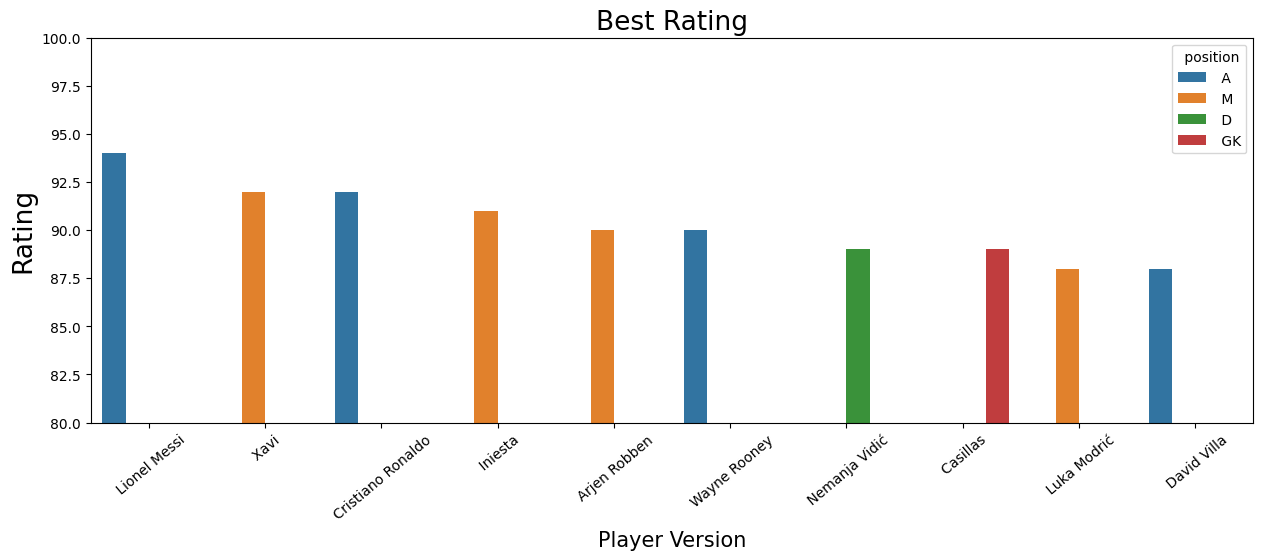

In [54]:
df = df.sort_values(by=' rating', ascending=False).drop_duplicates(subset=' name')
plt.figure(figsize=(15,5))
sns.barplot(x=' name', y=' rating', ci=None, hue=' position', data=df)
plt.ylabel('Rating', fontsize=19)
plt.xlabel('Player Version', fontsize=15)
plt.title("Best Rating", fontsize=19)
plt.ylim(80,100)
plt.xticks(rotation=40)